# Netflix Userbase - Exploratory Data Analysis
 Dataset: ```Netflix_Userbase.csv```
 
 **Guiding Questions:**
 1) What country contains the most Netflix subscribers?
 2) What is the average monthly spend per individual, by country?
 3) What is the most popular Netflix subscription plan amongst users?
 4) What Netflix subscription plan has the longest lifespan amongst users?
 
 ## Process:

- Import pandas and matplotlib for future analysis and visualization
- Read in ```Netflix_Userbase.csv```
- Select style for visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Netflix_Userbase.csv")
plt.style.use("seaborn-v0_8-darkgrid")

- Conduct initial data examination to understand datasets structure and characteristics

In [2]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10/6/2023,USA,28,Male,Smartphone,1 Month
1,2,Premium,15,5/9/2021,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10/7/2022,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,1/5/2023,28-06-23,Germany,33,Male,Smartphone,1 Month


- Gain insight from data types and plan for modifications, if any
- In this case, we would like to adjust ```Join Date``` and ```Last Payment Date``` into a ```datetime``` datatype and adjust ```Plan Duration``` to an ```int``` datatype

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2495 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


- Here we can determine the average monthly revenue per individual across 2500 users: ```12.51```
- We also examine the age range of our dataset and conclude the following:
    - Avg. Age: ```~38.8 years```
    - Min. Age: ```26 years```
    - Max Age:  ```51 years```

In [4]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


- We check our dataset for duplicates and conclude all rows are unique

In [5]:
df.duplicated().value_counts()

False    2500
Name: count, dtype: int64

- We scan through our dataset to find any black or NaN values
    - We conclude that there are 5 values of interest in the ```Plan Duration``` column

In [6]:
df.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        5
dtype: int64

In [7]:
df[df.isna().any(axis = 1)]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
11,12,Premium,15,23-03-23,28-06-23,Canada,45,Male,Tablet,NaN
216,217,Basic,15,13-11-22,25-06-23,Brazil,44,Male,Smart TV,NaN
629,630,Basic,15,6/10/2022,30-06-23,Germany,32,Female,Smart TV,NaN
1197,1198,Standard,10,1/11/2022,4/7/2023,United Kingdom,38,Female,Laptop,NaN
2400,2401,Basic,11,16-10-22,11/7/2023,France,35,Female,Laptop,NaN


- Because ```Plan Duration``` is always '1 Month', we fill in the values as so to eliminate NaN values

In [8]:
df["Plan Duration"] = df["Plan Duration"].fillna("1 Month")

- We change all the values in ```Plan Duration``` to 1 for easier manipulation, if needed.

In [9]:
df.loc[df["Plan Duration"] == "1 Month", "Plan Duration"] = 1

- Double check all missing values are gone

In [10]:
df.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

- We adjust the format and data type for both ```Join Date``` and ```Last Payment Date```

In [11]:
df["Join Date"] = pd.to_datetime(df["Join Date"], format = "mixed" ,dayfirst = True)
df["Last Payment Date"] = pd.to_datetime(df["Last Payment Date"], format = "mixed", dayfirst = True)

In [12]:
df[["Join Date", "Last Payment Date"]]

,Join Date,Last Payment Date
0,2022-01-15,2023-06-10
1,2021-09-05,2023-06-22
2,2023-02-28,2023-06-27
3,2022-07-10,2023-06-26
4,2023-05-01,2023-06-28
...,...,...
2495,2022-07-25,2023-07-12
2496,2022-08-04,2023-07-14
2497,2022-08-09,2023-07-15
2498,2022-08-12,2023-07-12


- We create a new column that contains the current lifespan of the users plan by subtracting their ```Last Payment Date``` by their ```Join Date```
- We also adjust column name for easier readability and understanding

In [13]:
df["Subscription Duration (Days)"] = df["Last Payment Date"] - df["Join Date"]

In [14]:
df = df.rename(columns={"Plan Duration": "Subcription Plan (Month)"})

- We check for unique values under the ```Country``` column and identify format differences
- We replace all unwanted formats to the desired format using a dictionary

In [15]:
df["Country"].unique()

array(['USA', 'Canada', 'United Kingdom', 'Australia', 'Germany',
       'France', 'Brazil', 'Mexico', 'Spain', 'Italy', 'United States',
       'mexico', 'canada', 'UK', 'italy', 'US', 'AUS', 'MX', 'spain',
       'france', 'brazil'], dtype=object)

In [16]:
data_dict = {
    "USA" : "United States",
    "mexico" : "Mexico",
    "canada" : "Canada",
    "UK" : "United Kingdom",
    "italy" : "Italy",
    "US" : "United States",
    "AUS" : "Australia",
    "MX" : "Mexico",
    "spain" : "Spain",
    "france" : "France",
    "brazil" : "Brazil"
}

In [17]:
df["Country"] = df["Country"].replace(data_dict)

In [18]:
df["Country"].unique()

array(['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy'],
      dtype=object)

- We take another look at our data set for null values and datatypes 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   User ID                       2500 non-null   int64          
 1   Subscription Type             2500 non-null   object         
 2   Monthly Revenue               2500 non-null   int64          
 3   Join Date                     2500 non-null   datetime64[ns] 
 4   Last Payment Date             2500 non-null   datetime64[ns] 
 5   Country                       2500 non-null   object         
 6   Age                           2500 non-null   int64          
 7   Gender                        2500 non-null   object         
 8   Device                        2500 non-null   object         
 9   Subcription Plan (Month)      2500 non-null   object         
 10  Subscription Duration (Days)  2500 non-null   timedelta64[ns]
dtypes: datetime64[ns]

- We now begin our analysis byt taking a look at the ages contained in the dataset to understand the range of ages
- As before, we conclude the following:
    - Age Range: 26 - 51
    - Avg. Age: ~38.8
- We also create a histogram to better visualize the distribution of our age range for possible insight
- We can determine that each age group is represented by atleast 150 participants and that there is no clear symmetry in our histogram

In [20]:
df["Age"].describe()

count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: Age, dtype: float64

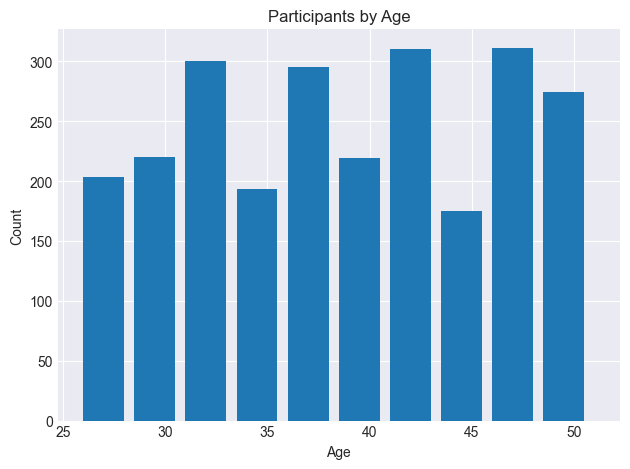

In [21]:
df["Age"].plot(kind = "hist", width = 2)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Participants by Age")
plt.tight_layout()
plt.show()

- We now take a look at our first and second guiding questions of our EDA

**1) What country contains the most Netflix subscribers?**

- From our graph "Subscriptions per Country," we can determine that there are two countries with the highest amount of subscribers, Spain and the United States with 451 subscribers.

- We also learn that Canada follows in third, with 317 subscribers
    
- All other countries have 183 subscribers, the lowest total amount of subscribers

**2) What is the average monthly spend per individual, by country?**

- "Average Monthly Spend per Individual by Country" illustrates that the United Kingdom averages the highest monthly spend per individual.

- The United Kindom leads ahead of Italy by one cent.

- The gap between the United Kingdom and the median average monthly spend per individual is 15 cents.

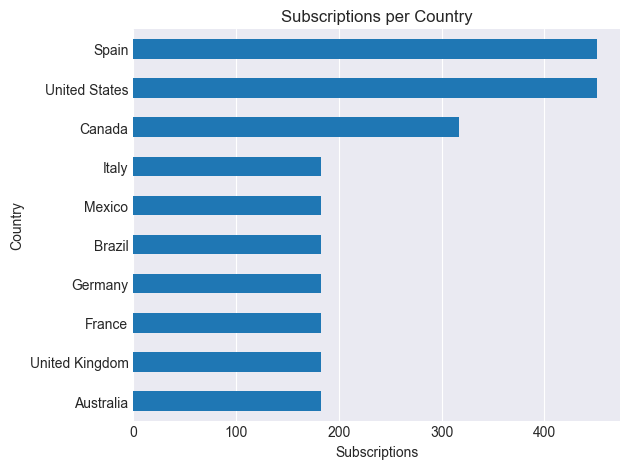

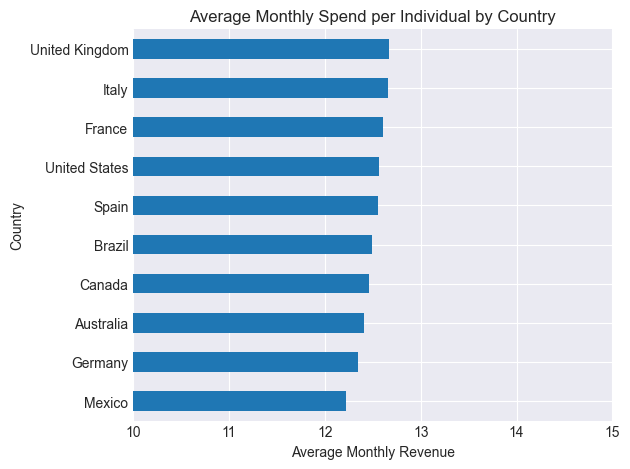

In [22]:
df["Country"].value_counts(ascending = True).plot(kind="barh")
plt.grid(axis = 'y')
plt.xlabel("Subscriptions")
plt.ylabel("Country")
plt.title("Subscriptions per Country")
plt.tight_layout()
plt.show()

df_Country_mRevenue = df[["Country", "Monthly Revenue"]]
df_avgByCountry = df_Country_mRevenue.groupby("Country")["Monthly Revenue"].mean().round(2).sort_values(ascending= True)
ax = df_avgByCountry.plot(kind = 'barh')
ax.set_xlim(10, 15)
plt.xlabel("Average Monthly Revenue")
plt.ylabel("Country")
plt.title("Average Monthly Spend per Individual by Country")
plt.tight_layout()
plt.show()

In [23]:
df["Country"].value_counts()

Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Germany           183
Australia         183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

In [24]:
df_avgByCountry

Country
Mexico            12.22
Germany           12.35
Australia         12.41
Canada            12.46
Brazil            12.49
Spain             12.55
United States     12.56
France            12.61
Italy             12.66
United Kingdom    12.67
Name: Monthly Revenue, dtype: float64

In [25]:
df_avgByCountry.median()

np.float64(12.52)

- We now move onto our third and fourth guiding questions

3) What is the most popular Netflix subscription plan amongst users?

- Between the three subscription types, The Basic subscription plan is the most popular amonst all user. 10.7 percentage points more than the least popular subscription type, Premium.

- The Standard subscription plan is only 1.7 percentage points ahead of the least popular subsciption plan.

4) What Netflix subscription plan has the longest lifespan amongst users?

- Although The standard subscription plan is neither the most or least popular, it has the highest lifespan amongst users.

- The Premium and Basic plans follow behind by 4 days.

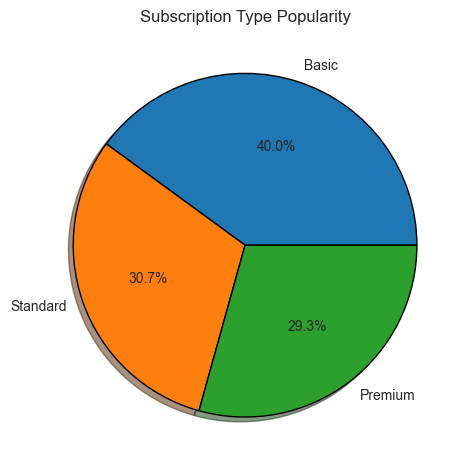

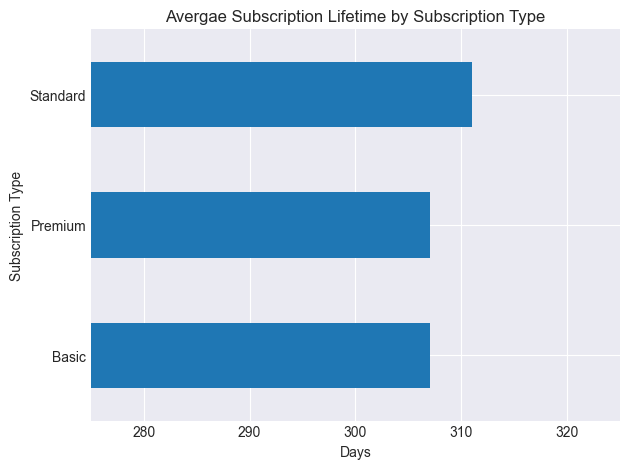

In [ ]:
df_Sub_Type_Count = df["Subscription Type"].value_counts()
slice_labels= df_Sub_Type_Count.index.to_numpy()
plt.pie(df_Sub_Type_Count, wedgeprops= {'edgecolor': 'k'}, shadow = True, 
        labels = slice_labels, autopct= '%1.1f%%')
plt.title("Subscription Type Popularity")
plt.tight_layout()
plt.show()

df_Sub_Type_Length = df.groupby("Subscription Type")["Subscription Duration (Days)"].mean().dt.days.sort_values(ascending= True)
ax = df_Sub_Type_Length.plot(kind = "barh")
ax.set_xlim(275,325)
plt.xlabel("Days")
plt.ylabel("Subscription Type")
plt.title("Average Subscription Lifetime by Subscription Type")
plt.tight_layout()
plt.show()

In [28]:
df_Sub_Type_Length

Subscription Type
Basic       307
Premium     307
Standard    311
Name: Subscription Duration (Days), dtype: int64

## Key Insights

From our Exploratory Data Analysis we can extract these key insights:

- Spain and the United States have the most user subscriptions, however, the United Kingdom has the highest average monthly spend per individual followed closely behind by Italy.

- Of the three Subscription Types, the Basic plan is the most popular amongst users. However, users subscribe to the Standard plan for a longer period of time, suggesting better retention.

## Limitations

**Data Coverage:**
- The countries with the highest users were more than twice as large of a sample size than the countries with the lowest amount of users indicating an imbalance of sample size.

- The time window of our data only encompasses a small time period of the lifespan of Netflix.

**Temporal Effects:**
- Data set only covers a static point in time. Does not consider price changes, subsciption adjustments, promotional periods.

**No Causality**
- Findings do not establish that plan type causes higher revenue or longer retention.

